<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER3%20%EB%B9%84%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5%EA%B3%BC%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

비지도 학습(unsupervised learning)이란 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝을 의미함. 입력 데이터만으로 데이터에서 지식을 추출해야 함.

# 3.1 비지도 학습의 종류

- '비지도 변환(unsupervised transformation)'은 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘임. 가장 널리 사용되는 분야는 특성이 많은 고차원 데이터의 특성 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 '차원 축소(dimensionality reduction)'이며, 대표적인 예는 시각화를 위해 데이터셋을 2차원으로 변경하는 것임.   

 데이터를 구성하는 단위나 성분을 찾기도 함. 많은 텍스트 문서에서 주제를 추출하는데, 이때 처리할 작업은 문서에서 다루는 주제가 무엇인지 찾고 학습하는 것임. 소셜 미디어에서 여러 특정 주제로 이뤄지는 토론을 찾아내는 수단으로 사용될 수 있음.

- '군집(clustering)'은 데이터를 비슷한 것끼리 묶는 것임. 사진에 있는 얼굴들을 추출해서 비슷한 얼굴로 그룹화하고, 같은 사람의 얼굴이라면 이미지들을 그룹으로 묶음.

# 3.2 비지도 학습의 도전 과제

비지도 학습에서 가장 어려운 일은 알고리즘이 어떤 유용한 것을 학습했는지 평가하는 것임. 이 학습 방식에서는 보통 레이블이 없는 데이터에 적용하기 때문에 무엇이 올바른 출력인지 알 수 없으므로 어떤 모델이 유용한지 설명하기가 난해함. 예를 들면 가상의 군집 알고리즘이 사람 얼굴을 분류하는 방법으로서 옆모습 사진과 앞모습 사진으로 그룹을 나눌 수 있지만 정작 이는 우리가 원하는 방법은 아님. 비지도 학습의 결과를 평가하려면 결국 직접 확인하는 것이 유일한 방법일 경우가 많음.

따라서 비지도 학습 알고리즘은 데이터를 더 잘 파악하고 싶을 때 탐색적분석 단계에서 많이 사용하거나, 지도 학습의 전처리 단계에서도 사용함. 비지도 학습의 결과로 새롭게 표현된 데이터를 사용해서 학습하면 지도 학습의 정확도가 좋아지기도 하고 자원(시간, 메모리 등)을 절약할 수 있음.

# 3.3 데이터 전처리와 스케일 조정

지도 학습 알고리즘에서 전처리와 스케일 조정을 자주 사용하지만, 기실 스케일 조정 메서드는 '지도 정보(supervised information)'를 사용하지 않으므로 비지도 방식이라고 할 수 있음.

신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감하므로 특성마다 스케일을 조정해서 데이터를 변경해야 함.

In [84]:
pip install mglearn

In [85]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

특성 두 개를 인위적으로 만든 이진 분류 데이터셋을 사용해서 그래프를 그림.

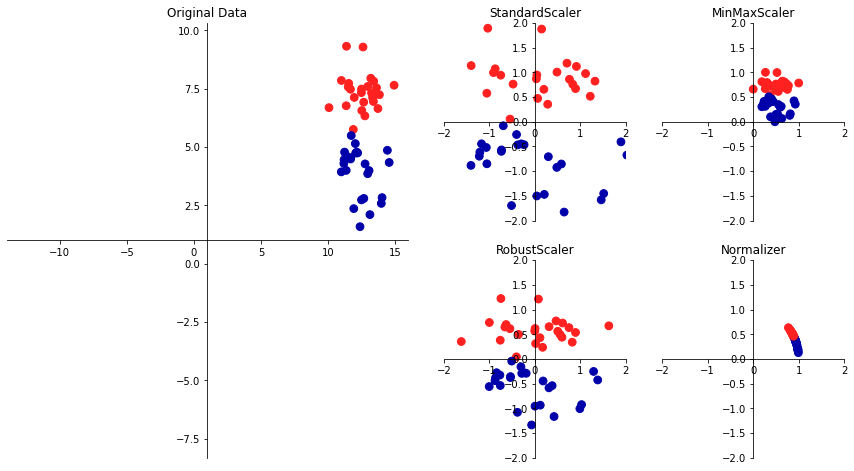

In [86]:
mglearn.plots.plot_scaling()

## 3.3.1 여러 가지 전처리 방법

위 그래프에 대해 간략하게 설명함. 먼저 첫 번째 그래프의 경우 첫 번째 특성(x축의 값)은 10과 15 사이에 있고, 두 번째 특성(y축의 값)은 1과 9 사이에 있음. 이 그래프를 토대로 오른쪽에 위치한 그래프 네 개로 전처리를 한 것임.

- `StandardScaler`: 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 갖게 됨. 다만 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지는 않음. 공식은 $\frac{x-\overline{x}}{\sigma}$이며 $\overline{x}$는 평균, $\sigma$는 표준편차임. 이 값을 표준 점수(표준값, z-점수)라고 함.

- `RobustScaler`: 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 `StandardScaler`와 비슷하지만, 평균과 분산 대신 중간 값(median)과 사분위 값(quartile)을 사용함. 중간 값은 $x$보다 작은 수가 절반이고 $x$보다 큰 수가 절반인 $x$임. 1사분위 값은 $x$보다 작은 수가 전체 개수의 1/4인 $x$이고, 3사분위는 $x$보다 큰 수가 전체 개수의 1/4인 $x$를 의미함. 공식은 $\frac{x-q_2}{q_3-q_1}$이며, $q_2$는 중간 값, $q_1$은 1사분위 값, $q_3$은 3사분위 값임.   
이런 방식 때문에 전체 데이터와 멀리 떨어진 샘플(e.g.측정 에러)에 영향을 받지 않음. 이런 이상 데이터를 '이상치(outlier)'라고 하며, 다른 스케일 조정 기법에서는 문제가 될 수 있음.

- `MinMaxScaler`: 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 바꿈. $\frac{x-x_{min}}{x_{max}-x_{min}}$이며, 데이터에서 최솟값을 빼고 전체 범위로 나눔. 2차원 데이터셋일 경우에는 모든 데이터가 x축의 0과 1, y축의 0과 1 사이의 사각 영역에 담김.

- `Normalizer`: 특성 벡터의 유클리디안 길이가 1이 되도록 샘플을 조정함. 매개변수 `norm`은 `l1`, `l2`, `max` 값을 제공하고, 기본값은 유클리디안 거리를 의미하는 `l2`임. 위 세 가지 전처리 방법은 각 특성(열)의 통계치를 사용하지만, `Normalizer`는 샘플(행)마다 정규화됨.   
여하튼 지름이 1인 원(3차원일 경우에는 구)에 샘플을 투영함. 다시 말하면 각 샘플이 다른 비율로 길이에 반비례하여 스케일이 조정되는 것을 의미함. 이런 정규화(normalization)는 특성 벡터의 길이와는 무관하며 데이터의 방향이나 각도만이 중요할 때 많이 사용함.

## 3.3.2 데이터 변환 적용하기

일반적으로 지도 학습 알고리즘을 적용하기 전에 스케일을 조정하는 전처리 메서드를 사용함. 먼저 데이터를 적재하고 훈련 세트와 테스트 세트로 나눔(전처리 후에 생성된 지도 학습 모델을 평가하기 위해 훈련 세트와 테스트 세트로 나눠야 함).

cancer 데이터셋을 사용하여 데이터를 변환함. 커널 SVM(`SVC`)을 적용하고 전처리에 `MinMaxScaler`를 사용할 예정임. 먼저 데이터를 훈련 세트와 데이터 세트로 나누고 데이터셋의 형태를 살핌.

In [87]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


샘플 569개와 특성 30개로 구성된 데이터셋이고, 샘플 426개를 훈련 세트, 143개를 테스트 세트로 나눔.

전처리가 구현된 '파이썬 클래스'를 임포트 하고 객체를 생성함(지금까지 책과 정리본에서 사용해 온 클래스라는 용어는 분류형 문제에서 출력값과 범주형 특성을 의미했으므로, 프로그램 언어의 클래스를 의미할 땐 '파이썬 클래스'로 지칭할 예정이나, 의미를 혼동하지 않을 만한 위치에 해당 내용을 서술한다면 단순하게 클래스라고 지칭할 예정임).

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

`fit` 메서드에 훈련 데이터를 적용함. `MinMaxScaler`의 `fit` 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산함. 분류 모델과 회귀 모델과 달리 스케일 객체는 `fit` 메서드를 호출할 때 'X_train'만 넘겨주고 'y_train'은 사용하지 않음.

In [89]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

`fit` 메서드로 학습한 변환을 적용하려면(훈련 데이터의 스케일을 조정하려면) 스케일 객체의 `transform` 메서드를 사용함. `transform` 메서드는 새로운 데이터 표현(representation)을 만들 때 사용함.

In [90]:
# 훈련 데이터를 변환함.
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 데이터셋의 속성을 출력함.
print('변환된 후 크기:', X_train_scaled.shape)
print('스케일 조정 전 특성별 최솟값:\n', X_train.min(axis=0))
print('스케일 조정 전 특성별 최댓값:\n', X_train.max(axis=0))
print('스케일 조정 후 특성별 최솟값:\n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최댓값:\n', X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


특성 값이 이동되거나 크기가 조정되었을 뿐이므로 변환된 데이터의 배열 크기는 원래 데이터와 동일함. 그러나 모든 특성 값은 0과 1 사이로 조정됨.

SVM을 적용하려면 테스트 세트도 함께 전처리해야 함. 방식은 위와 같음.

In [91]:
# 테스트 데이터를 변환함.
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 데이터셋의 속성을 출력함.
print('스케일 조정 후 특성별 최솟값:\n', X_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최댓값:\n', X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최솟값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


0과 1 사이의 값이 아님. 일부는 음수거나 1을 넘어가버림. `MinMaxScaler`를 포함한 모든 스케일 모델은 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 함. `transform` 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눔. 항상 훈련 세트의 통계치를 사용하기 때문에 테스트 세트에 대한 스케일 조정 공식은 $\frac{X_{test}-X_{train_min}}{X_{train_max}-{X_{train_min}}}$이 되며, LaTex 문법의 한계로 인해 명확하게 표현하지 못했음. 분모는 X_train_max - X_train_min이고, 분자는 X_test - X_train_min임.

## 3.3.3 QuantileTransformer와 PowerTransformer

`QuantitleTransformer`: 분위(quantile) 1,000개를 사용해서 데이터를 균등하게 분포하도록 함. `RobustScaler`와 비슷하게 이상치에 민감하지 않고 데이터 전체를 0과 1 사이로 압축함.

뒤에서 사용했던 데이터셋에 `QuantileTransformer`를 적용함. 먼저 예제 데이터를 생성하고 산점도를 그림.

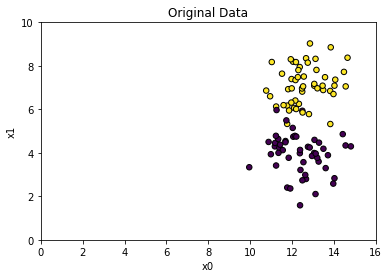

In [92]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples=100, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.ylim(0,10)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

각 샘플이 흩어진 형태로 분포함. `QuantileTransformer`를 적용해서 변화된 스케일을 확인함.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


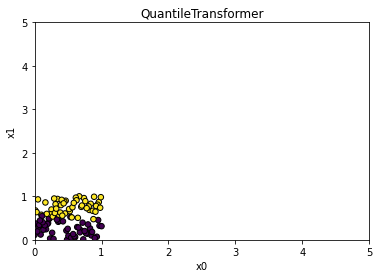

In [93]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

샘플이 0과 1 사이에 고르게 모여있음. 히스토그램을 그려서 확인함.

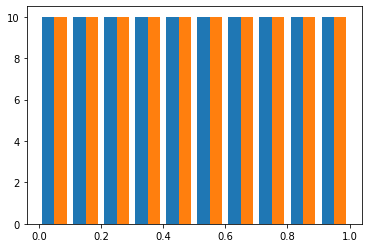

In [94]:
plt.hist(X_trans)
plt.show()

`QuantileTransformer`의 분위 수는 `n_quantiles`(기본값 `1,000`) 매개변수에 설정할 수 있음. 'scaler' 객체의 `quantiles_` 속성에 특성별로 계산된 분위 값을 가지므로 이 속성의 크기는 `(n_quantiles, n_features)`임.

In [95]:
print(scaler.quantiles_.shape)

(100, 2)


`QuantileTransformer`의 동작을 좀 더 살펴보기 위해 간단한 샘플 데이터를 변환한 결과를 비교함. `np.percentile()` 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환함.

In [96]:
# 첫 번째, 1사분위, 중간값, 3사분위, 마지막 값을 지정함.
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


훈련 샘플이 다섯 개이므로 지정한 분위가 훈련 샘플과 일치함.

`QuantileTransformer`로 변환하여 확인함.

In [97]:
x_trans = QuantileTransformer().fit_transform(x)
print(x_trans)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]
[0.   0.25 0.5  0.75 1.  ]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


데이터가 분위와 같은 값으로 변환됨.

`QuantileTransformer`는 `out_distribution` 매개변수의 값을 `normal`로 지정하여 균등분포를 정규분포로 바꿀 수 있음.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


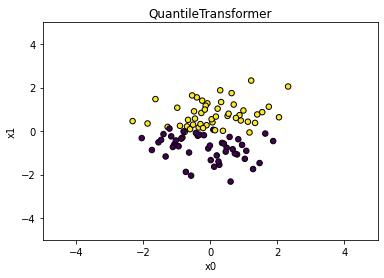

In [98]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

`PowerTransformer` 클래스는 `method` 매개변수에 `yeo-johnson`(기본값)과 `box-cox` 알고리즘을 지정할 수 있음. 

`QuantileTransformer` 클래스와 `StandardScaler`, `PowerTransformer` 클래스가 데이터셋을 정규분포로 변환하는 형태를 히스토그램으로 그림.

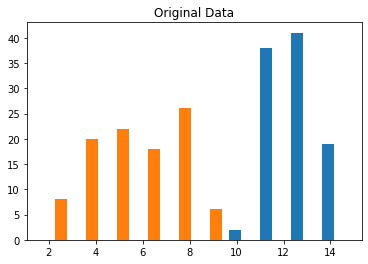

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


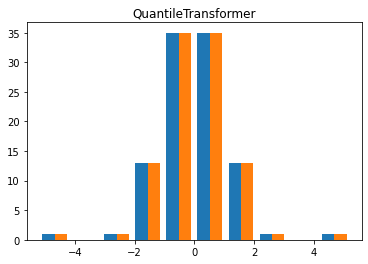

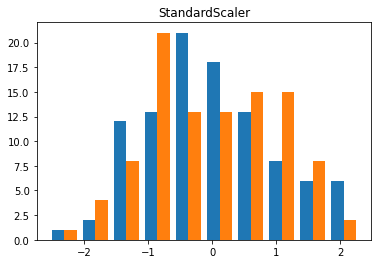

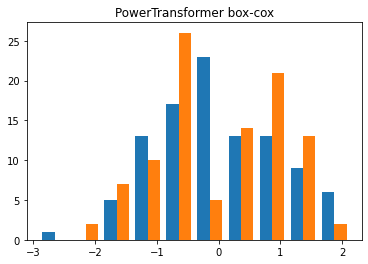

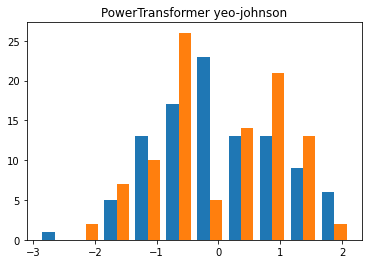

In [106]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()
print()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()
print()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()
print()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

`PowerTransformer` 클래스에 매개변수를 다르게 지정했지만 같은 결과를 출력함. 실전에서는 데이터셋마다 어떤 변환이 정규분포에 가깝게 변환할지 예측하기 어려우므로 히스토그램을 그려서 확인하는 과정을 밟는 것이 좋음.

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

## 3.3.5 지도 학습에서 데이터 전처리 효과

# 3.4 차원 축소, 특성 추출, 매니폴드 학습

## 3.4.1 주성분 분석(PCA)

### PCA를 적용해 유방암 데이터셋 시각화하기

### 고유얼굴(eigenface) 특성 추출

## 3.4.2 비음수 행렬 분해(NMF)

### 인위적 데이터에 NMF 적용하기

### 얼굴 이미지에 NMF 적용하기

## 3.4.3 t-SNE를 이용한 매니폴드 학습

# 3.5 군집

## 3.5.1 k-평균 군집

### k-평균 알고리즘이 실패하는 경우

### 벡터 양자화 또는 분해 메서드로서의 k-평균

## 3.5.2 병합 군집

### 계층적 군집과 덴드로그램

## 3.5.3 DBSCAN

## 3.5.4 군집 알고리즘의 비교와 평가

### 타깃값으로 군집 평가하기

### 타깃값 없이 군집 평가하기

### 얼굴 데이터셋으로 군집 알고리즘 비교

#### DBSCAN으로 얼굴 데이터셋 분석하기

#### k-평균으로 얼굴 데이터셋 분석하기

#### 병합 군집으로 얼굴 데이터셋 분석하기

## 3.5.5 군집 알고리즘 요약

# 3.6 요약 및 정리